```
conda install -c conda-forge scikit-learn pandas
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### Primera actividad de redes neuronales

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_data = cancer.data
y_data = cancer.target

(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
- En el siguiente bloque explore la data, con el fin de responder a estas preguntas.

	I) ¿De que se trata el dataset?

	II) ¿Cuales son las clases de salida?

	III) ¿A que corresponden las caracteristicas?

	IV) ¿Cuantas caracteristicas y clases de salida hay?
	
	V) Etc.

**I)**  Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (AAF) de una masa mamaria.  Describen las características de los núcleos celulares presentes en la imagen.

**II)** Las clases de salida son 2: B (cáncer benigno) y M (cáncer maligno).

**III)** Las características son 30. Aqui van las descripciones de algunas:

	a) radio (media de las distancias del centro a los puntos del perímetro)

	b) textura (desviación típica de los valores de la escala de grises)

	c) perímetro

	d) área

	e) suavidad (variación local de las longitudes de los radios)

	f) compacidad (perímetro^2 / área - 1,0)

	g) concavidad (gravedad de las partes cóncavas del contorno)

	h) puntos cóncavos (número de porciones cóncavas del contorno)

	i) simetría 

	j) dimensión fractal ("aproximación de la línea de costa" - 1)

**IV)** Existen 32 caracteristicas  y dos clases de salida.


In [14]:
import torch
from torch.utils.data import random_split,DataLoader,TensorDataset

X = torch.tensor(X_data, dtype=torch.float32)
Y = torch.tensor(y_data, dtype=torch.long)

dataset = TensorDataset(X,Y)

train_set, valid_set,test_set = random_split(dataset, [342,113,114], generator=torch.Generator().manual_seed(1234)) # No cambiar la semilla

train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

print(len(train_loader))
print(len(train_set))

11
342


## Implentación de la Red Neuronal
- En el siguiente bloque implemente el modelo que utilizará su red neuronal para predecir si un paciente tiene cáncer o no, teniendo en cuenta sus caracteristicas.

In [4]:
import torch.nn as nn

class BreastCancerNN(nn.Module):
	def __init__(self,input_dim,hidden_dim,output_dim):
		super(BreastCancerNN, self).__init__()
		self.hidden = nn.Linear(input_dim, hidden_dim)
		self.output = nn.Linear(hidden_dim, output_dim)
		self.activation = nn.Sigmoid()
	def forward(self, x):
		x = self.hidden(x)
		x = self.activation(x)
		x = self.output(x)
		return x


- En el siguiente bloque cree una instancia de su red neuronal definida anteriormente y defina una función de pérdida y optimizador adecuados:

In [5]:
model = BreastCancerNN(30,15,2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

- Responda: 
	- ¿Porqué eligió esa función de pérdida?
		- Ocupamos CrossEntropyLoss ya que compara la distribucion de probabilidad predicha por el modelo con la distribucion real y clasifica instancias en categorias discretas, que es justo lo que necesitamos para este ejemplo, si tiene o no cancer de mama (0 o 1).
	- Elija 2 optimizadores populares y describalos, luego explique porqué elige uno de los 2.
		- SGD: El Stochastic gradient descent(SGD)  es un método iterativo para optimizar una función objetivo con propiedades de suavidad adecuadas (por ejemplo, diferenciable o subdiferenciable). Puede considerarse una aproximación estocástica de la optimización por descenso de gradiente, ya que sustituye el gradiente real (calculado a partir de todo el conjunto de datos) por una estimación del mismo

		- Adam: The Adaptive Moment Estimation es un algoritmo para la técnica de optimización por descenso de gradiente. El método es realmente eficiente cuando se trabaja con grandes problemas que implican una gran cantidad de datos o parámetros. Requiere menos memoria y es eficiente. Intuitivamente, es una combinación del algoritmo de "gradient descent with momentum" y el algoritmo "RMSP".
	
	- **Elegimos Adamn** porque, segun la documentacion, es un algoritmo mas eficiente, algo importante al tener en consideracion que nuestros computadores utilizan la cpu para entrenar el modelo. Ademas, empiricamente, fue este el que nos funciono.  

- En el siguiente bloque programe el entrenamiento de su red neuronal

In [6]:
# Bucle de entrenamiento
train_losses = []
val_losses = []
for nepoch in range(1000):
    model.train()
    epoch_train_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        hatY = model(batch_x)
        loss = criterion(hatY, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)
    
    # Evaluar el modelo en el conjunto de validación después de cada época
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            predicted = model(batch_x)
            loss = criterion(predicted, batch_y)
            epoch_val_loss += loss.item()

    epoch_val_loss /= len(valid_loader)
    val_losses.append(epoch_val_loss)
    
    print(f'Epoch {nepoch} - Training Loss: {epoch_train_loss:.4f} - Validation Loss: {epoch_val_loss:.4f}')



loss.item:  0.7550517320632935
loss.item:  0.637959361076355
loss.item:  0.6683658957481384
loss.item:  0.6082099676132202
loss.item:  0.5400977730751038
loss.item:  0.5284314155578613
loss.item:  0.5493838787078857
loss.item:  0.5108968019485474
loss.item:  0.5343758463859558
loss.item:  0.557030439376831
loss.item:  0.44011151790618896
Epoch 0 - Training Loss: 0.5754 - Validation Loss: 0.4502
loss.item:  0.5771611332893372
loss.item:  0.490986704826355
loss.item:  0.582065224647522
loss.item:  0.5374247431755066
loss.item:  0.5062200427055359
loss.item:  0.5160358548164368
loss.item:  0.5171190500259399
loss.item:  0.5280932188034058
loss.item:  0.4405005872249603
loss.item:  0.4446648061275482
loss.item:  0.47315195202827454
Epoch 1 - Training Loss: 0.5103 - Validation Loss: 0.4291
loss.item:  0.5776037573814392
loss.item:  0.5725339651107788
loss.item:  0.4992120862007141
loss.item:  0.479264497756958
loss.item:  0.46855342388153076
loss.item:  0.5405203104019165
loss.item:  0.4342

- En el sigueinte bloque muestre el gráfico de entrenamiento y validación.
- ¿El entrenamiento de su red neuronal está "listo"?

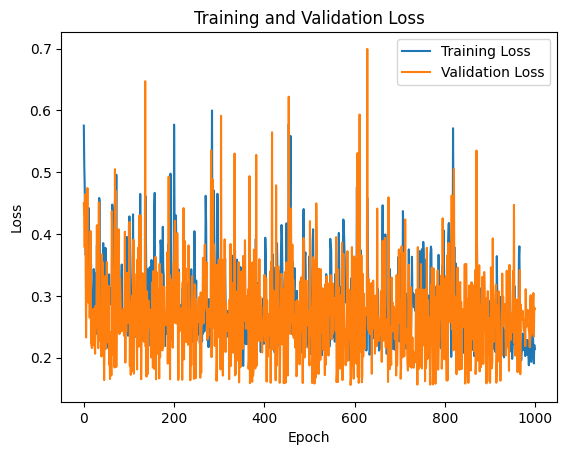

In [7]:
# Plotting de las pérdidas
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

**¿El entrenamiento de su red neuronal está "listo"?**

El entrenamiento de la red neuronal se puede considerar listo, ya que ambos valores convergen a un minimo estable. Este valor aproximadamente es 0.2, un valor totalmente aceptable y cercano al 0. Ademas, por mas iteraciones con las que sigamos, tampoco convergera mas, ya que esos valores se alcazaron en iteraciones anteriores y no bajo mucho mas de ese valor.

- En el siguiente bloque evalue que tan bueno es su modelo mediante diferentes métricas

Confusion Matrix:
[[33  1]
 [ 9 71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.99      0.89      0.93        80

    accuracy                           0.91       114
   macro avg       0.89      0.93      0.90       114
weighted avg       0.93      0.91      0.91       114

Accuracy: 0.9122807017543859


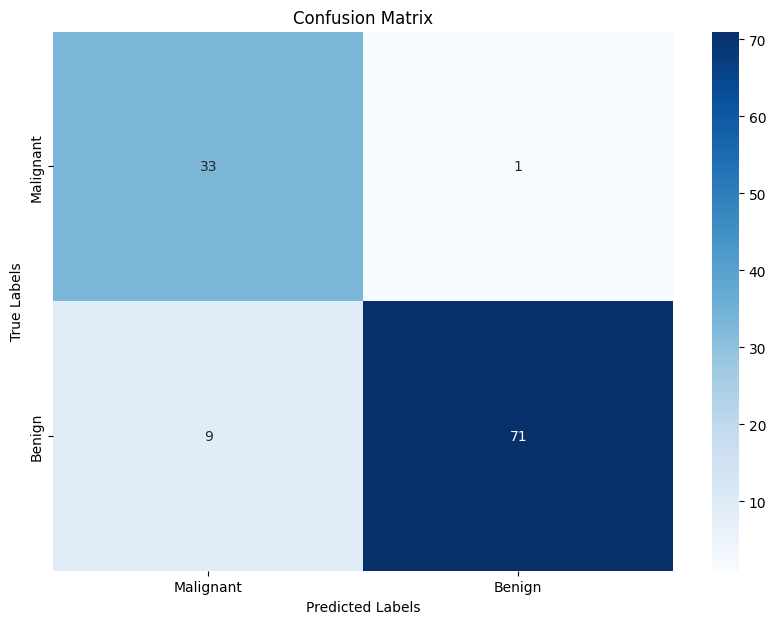

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluar el modelo en el conjunto de prueba
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

# Calcular las métricas
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Accuracy: {accuracy}')

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



- Concluya sobre su trabajo.  
- Responda
	- ¿Qué tan confiable sería su modelo en un entorno clínico? 
	- ¿Qué haría para mejorarlo?
	- Sobre la matriz de confusión, ¿Alguno de sus elementos son más importantes que otros en este caso?
	¿Que significaría el aumento de FN o FP en este caso? 
- Investigue sobre alguna arquitectura de red neuronal distinta a la utilizada en este trabajo, describala y explique en que casos sería útil.



El modelo resulta ser bastante solido y con un buen rendimiento basandonos en la evalucion hecha. Obteniendo una exactitud del 97% .

**¿Qué tan confiable sería su modelo en un entorno clínico?**

En un contexto clinico, no consideramos el modelo confiable, ya que obviando el hecho de que debe ser entrenado con nuevos y mas datos. Consideramos que el modelo aun tiene margen de mejora en un contexto de determinar una enfermedad tan importante como lo es el cancer, donde cada dia cuenta.

**¿Qué haría para mejorarlo?**

Siguiendo la propuesta anterior, el primer paso para mejorarlo seria incorporar nuevos datos al modelo, para probar como se comporta. Otra opcion seria implementar tecnicas de regularizacion para evitar el sobreajuste del modelo. Tambien podriamos centrarnos en encontrar un combinacion mas optima de los hiperparametros.

**Sobre la matriz de confusión, ¿Alguno de sus elementos son más importantes que otros en este caso? ¿Que significaría el aumento de FN o FP en este caso?**

En la matriz de confusion, el elemento mas importante son los Falsos negativos (FN), ya que estariamos en precencia de un paciente con cancer maligno no detectado. Respecto a Falso Positivo (FP) estariamos con un paciente con un cancer benigno detectado como maligno.
Un aumento en FN podria llevar a aumentos en la mortalidad o costos en la lucha contra el cancer debido a una deteccion tarde.
Un aumento en FP resultara en gastos y esfuerzos posiblemente innecesarios.

**Investigue sobre alguna arquitectura de red neuronal distinta a la utilizada en este trabajo, describala y explique en que casos sería útil.**

Una arquitectura interesante es la de Autoencoder o codificador automático que consta de tres partes principales: 
- codificador: comprime la entrada y captura las caracteristicas mas relevantes (tambien comprimiendola).
- capa oculta: almacena la información importante en un formato comprimido.
- decodificador: reconstruir la entrada original.

El entrenamiento consiste en ajustar los pesos para minimizar la diferencia entre la entrada y la salida reconstruida, optimizando el aprendizaje de patrones significativos. Esta arquitectura puede ser util en la reducción de ruido en conjuntos de datos complejos a través de su capacidad para reducir la dimensionalidad y reconstruir datos.

### Pregunta Bonus
- ¿Cúal es la principal limitación de las redes neuronales comparado al cerebro humano?

Las redes neuronales a pesar de que se inspiran en las del cerebro, aun no estan cerca de obtener los mismos resultados en cuanto al aprendizaje, si que hacemos una comparacion en terminos de volumenes de informacion por aprendizaje, es decir, el cerebro humano requiere menos cantidad de informacion para aprender, debido a que podemos generalizar y aprender de manera mas abstractra. Lo que lo hace sumamente mas eficiente y adaptable.